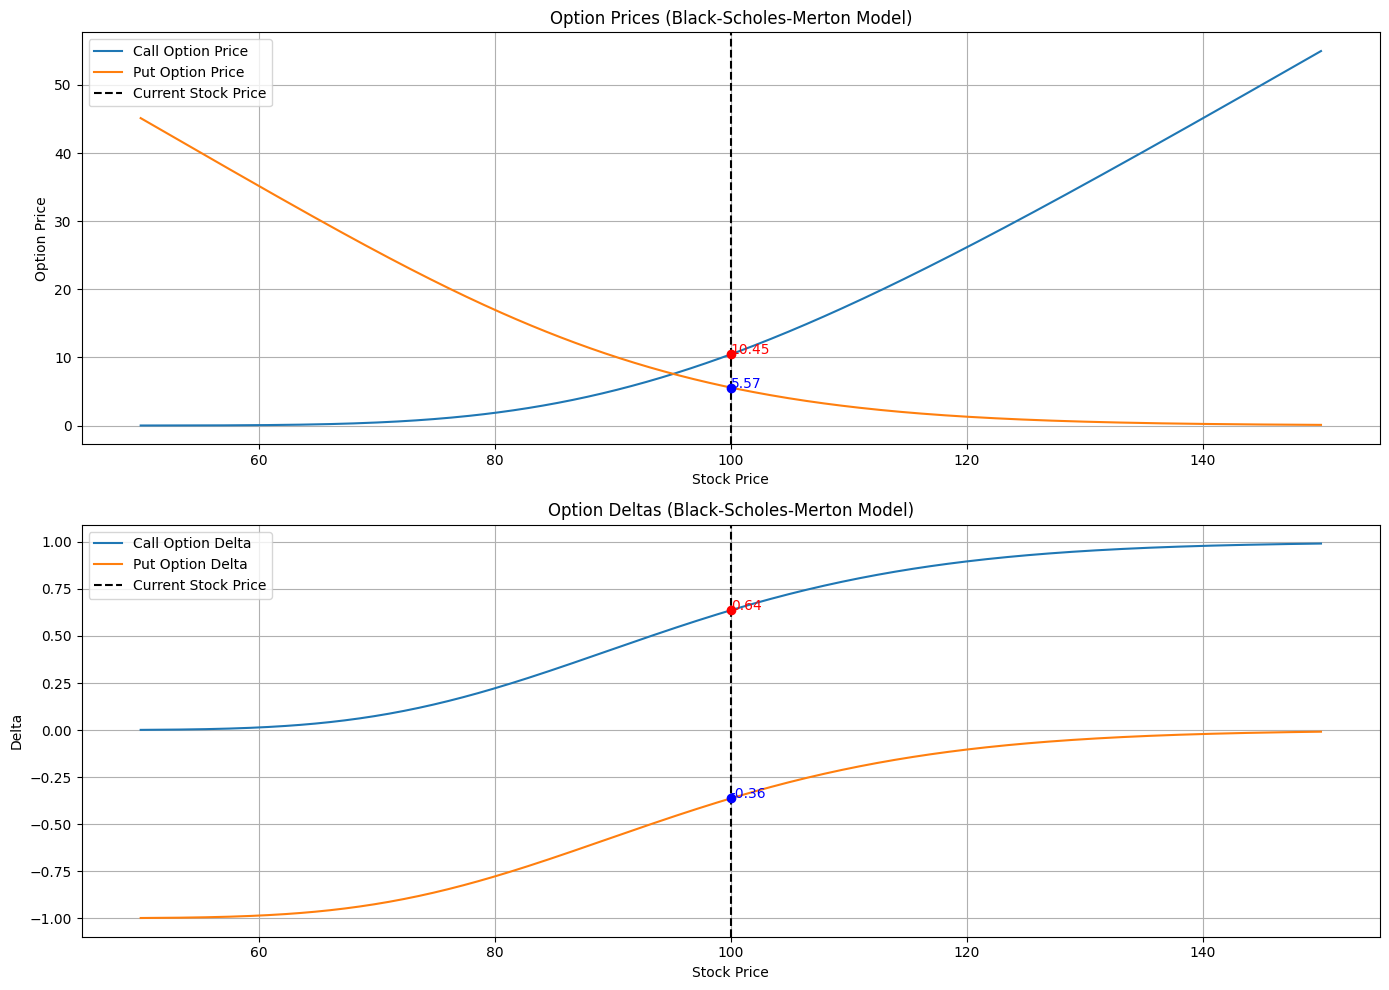

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def black_scholes_merton(S, K, T, r, sigma, option_type="call"):
    """
    블랙-숄즈-머튼 모델을 사용하여 유럽형 옵션 가격을 계산하는 함수

    Parameters:
    S: 현재 주식 가격
    K: 행사가격 (strike price)
    T: 옵션 만기 시간 (단위: 년)
    r: 무위험 이자율
    sigma: 주식 가격의 변동성
    option_type: "call" 또는 "put"

    Returns:
    옵션의 현재 가격
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return option_price

def black_scholes_merton_delta(S, K, T, r, sigma, option_type="call"):
    """
    블랙-숄즈-머튼 모델을 사용하여 유럽형 옵션의 델타를 계산하는 함수

    Parameters:
    S: 현재 주식 가격
    K: 행사가격 (strike price)
    T: 옵션 만기 시간 (단위: 년)
    r: 무위험 이자율
    sigma: 주식 가격의 변동성
    option_type: "call" 또는 "put"

    Returns:
    옵션의 델타 값
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    if option_type == "call":
        delta = norm.cdf(d1)
    elif option_type == "put":
        delta = norm.cdf(d1) - 1
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return delta

# 예제 파라미터
S0 = 100  # 현재 주식 가격
K = 100  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성

# 주식 가격 범위 설정
S_range = np.linspace(50, 150, 400)

# 옵션 가격 및 델타 값 계산
call_prices = [black_scholes_merton(S, K, T, r, sigma, option_type="call") for S in S_range]
put_prices = [black_scholes_merton(S, K, T, r, sigma, option_type="put") for S in S_range]
call_deltas = [black_scholes_merton_delta(S, K, T, r, sigma, option_type="call") for S in S_range]
put_deltas = [black_scholes_merton_delta(S, K, T, r, sigma, option_type="put") for S in S_range]

# 현재 주식 가격에서의 옵션 가격 및 델타 값 계산
current_call_price = black_scholes_merton(S0, K, T, r, sigma, option_type="call")
current_put_price = black_scholes_merton(S0, K, T, r, sigma, option_type="put")
current_call_delta = black_scholes_merton_delta(S0, K, T, r, sigma, option_type="call")
current_put_delta = black_scholes_merton_delta(S0, K, T, r, sigma, option_type="put")

# 시각화
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(S_range, call_prices, label='Call Option Price')
plt.plot(S_range, put_prices, label='Put Option Price')
plt.axvline(x=S0, color='k', linestyle='--', label='Current Stock Price')
plt.scatter([S0], [current_call_price], color='red', zorder=5)
plt.scatter([S0], [current_put_price], color='blue', zorder=5)
plt.text(S0, current_call_price, f'{current_call_price:.2f}', ha='left', color='red')
plt.text(S0, current_put_price, f'{current_put_price:.2f}', ha='left', color='blue')
plt.title('Option Prices (Black-Scholes-Merton Model)')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(S_range, call_deltas, label='Call Option Delta')
plt.plot(S_range, put_deltas, label='Put Option Delta')
plt.axvline(x=S0, color='k', linestyle='--', label='Current Stock Price')
plt.scatter([S0], [current_call_delta], color='red', zorder=5)
plt.scatter([S0], [current_put_delta], color='blue', zorder=5)
plt.text(S0, current_call_delta, f'{current_call_delta:.2f}', ha='left', color='red')
plt.text(S0, current_put_delta, f'{current_put_delta:.2f}', ha='left', color='blue')
plt.title('Option Deltas (Black-Scholes-Merton Model)')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
